# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [3]:
df=pd.read_csv('euro2024_players.csv')
df

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
0,Marc-André ter Stegen,Goalkeeper,32,FC Barcelona,187,right,40,0,28000000,Germany
1,Manuel Neuer,Goalkeeper,38,Bayern Munich,193,right,119,0,4000000,Germany
2,Oliver Baumann,Goalkeeper,34,TSG 1899 Hoffenheim,187,right,0,0,3000000,Germany
3,Nico Schlotterbeck,Centre-Back,24,Borussia Dortmund,191,left,12,0,40000000,Germany
4,Jonathan Tah,Centre-Back,28,Bayer 04 Leverkusen,195,right,25,0,30000000,Germany
...,...,...,...,...,...,...,...,...,...,...
618,Adam Hlozek,Second Striker,21,Bayer 04 Leverkusen,188,right,31,2,12000000,Czech Republic
619,Patrik Schick,Centre-Forward,28,Bayer 04 Leverkusen,191,left,37,18,22000000,Czech Republic
620,Mojmír Chytil,Centre-Forward,25,SK Slavia Prague,187,-,12,4,6500000,Czech Republic
621,Jan Kuchta,Centre-Forward,27,AC Sparta Prague,185,right,20,3,5000000,Czech Republic


# EDA

In [4]:
df.head(5)

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
0,Marc-André ter Stegen,Goalkeeper,32,FC Barcelona,187,right,40,0,28000000,Germany
1,Manuel Neuer,Goalkeeper,38,Bayern Munich,193,right,119,0,4000000,Germany
2,Oliver Baumann,Goalkeeper,34,TSG 1899 Hoffenheim,187,right,0,0,3000000,Germany
3,Nico Schlotterbeck,Centre-Back,24,Borussia Dortmund,191,left,12,0,40000000,Germany
4,Jonathan Tah,Centre-Back,28,Bayer 04 Leverkusen,195,right,25,0,30000000,Germany


In [5]:
df.tail(5)

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
618,Adam Hlozek,Second Striker,21,Bayer 04 Leverkusen,188,right,31,2,12000000,Czech Republic
619,Patrik Schick,Centre-Forward,28,Bayer 04 Leverkusen,191,left,37,18,22000000,Czech Republic
620,Mojmír Chytil,Centre-Forward,25,SK Slavia Prague,187,-,12,4,6500000,Czech Republic
621,Jan Kuchta,Centre-Forward,27,AC Sparta Prague,185,right,20,3,5000000,Czech Republic
622,Tomas Chory,Centre-Forward,29,FC Viktoria Plzen,199,right,3,2,3200000,Czech Republic


In [6]:
df.shape

(623, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         623 non-null    object
 1   Position     623 non-null    object
 2   Age          623 non-null    int64 
 3   Club         623 non-null    object
 4   Height       623 non-null    int64 
 5   Foot         620 non-null    object
 6   Caps         623 non-null    int64 
 7   Goals        623 non-null    int64 
 8   MarketValue  623 non-null    int64 
 9   Country      623 non-null    object
dtypes: int64(5), object(5)
memory usage: 48.8+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,623.0,2.704013e+01,4.124275e+00,16.0,24.0,27.0,30.0,41.0
Height,623.0,1.841814e+02,6.569258e+00,167.0,180.0,185.0,189.0,202.0
Caps,623.0,3.033868e+01,3.098790e+01,0.0,7.0,21.0,42.0,206.0
Goals,623.0,4.152488e+00,1.008680e+01,0.0,0.0,1.0,4.0,128.0
MarketValue,623.0,1.840903e+07,2.426195e+07,50000.0,2900000.0,9000000.0,25000000.0,180000000.0


<Axes: >

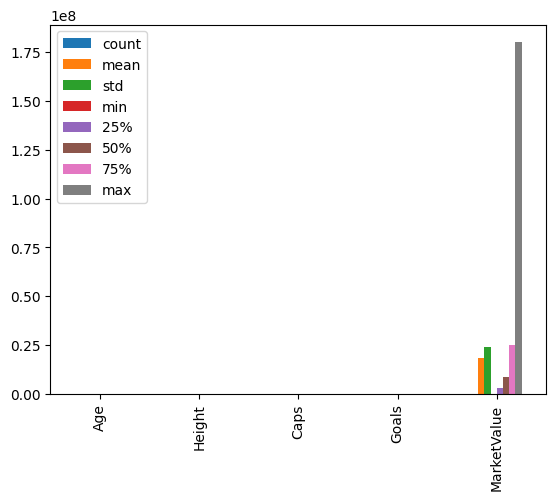

In [11]:
df.describe().T.plot(kind='bar')

In [12]:
df.isna().sum()

Name           0
Position       0
Age            0
Club           0
Height         0
Foot           3
Caps           0
Goals          0
MarketValue    0
Country        0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
#Choose only numerical columns to make correlation matrix
num_cols=df.select_dtypes(include=np.number).columns
num_cols

Index(['Age', 'Height', 'Caps', 'Goals', 'MarketValue'], dtype='object')

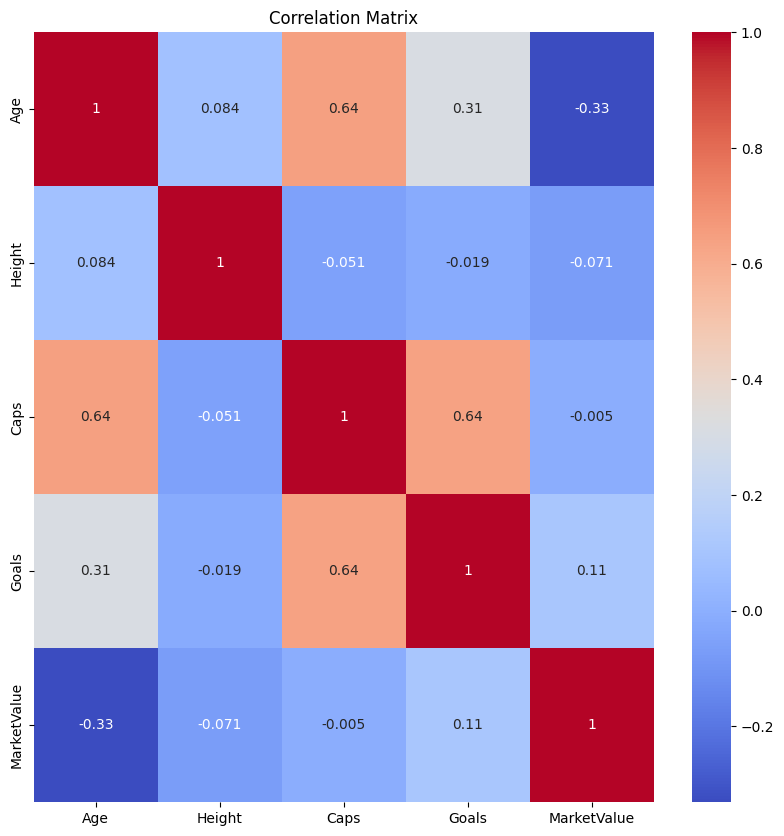

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df[num_cols].corr(),annot=True,cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [17]:
df.columns.to_list()

['Name',
 'Position',
 'Age',
 'Club',
 'Height',
 'Foot',
 'Caps',
 'Goals',
 'MarketValue',
 'Country']

In [18]:
most_goal_index=df['Goals'].idxmax()
most_goal_index

596

In [24]:
player_with_most_goals=df.loc[most_goal_index]
print("Player with the most goals:")
print(player_with_most_goals)

Player with the most goals:
Name           Cristiano Ronaldo
Position          Centre-Forward
Age                           39
Club                 Al-Nassr FC
Height                       188
Foot                       right
Caps                         206
Goals                        128
MarketValue             15000000
Country                 Portugal
Name: 596, dtype: object


In [20]:
least_goal_index=df['Goals'].idxmin()
least_goal_index

0

In [23]:
player_with_least_goals=df.loc[least_goal_index]
player_with_least_goals
print("Player with the least goals:")
print(player_with_least_goals)

Player with the least goals:
Name           Marc-André ter Stegen
Position                  Goalkeeper
Age                               32
Club                    FC Barcelona
Height                           187
Foot                           right
Caps                              40
Goals                              0
MarketValue                 28000000
Country                      Germany
Name: 0, dtype: object


In [27]:
most_caps_index = df['Caps'].idxmax()
player_most_caps = df.loc[most_caps_index,['Name','Caps']]

print("Player with the most caps:")
print(player_most_caps)

Player with the most caps:
Name    Cristiano Ronaldo
Caps                  206
Name: 596, dtype: object


In [34]:
player_most_Club = df.loc[most_caps_index]

print("Player with the most Club:")
print(player_most_Club)

Player with the most Club:
Name           Cristiano Ronaldo
Position          Centre-Forward
Age                           39
Club                 Al-Nassr FC
Height                       188
Foot                       right
Caps                         206
Goals                        128
MarketValue             15000000
Country                 Portugal
Name: 596, dtype: object


In [35]:
foot=df['Foot'].value_counts()
foot

Foot
right    436
left     150
both      31
-          3
Name: count, dtype: int64

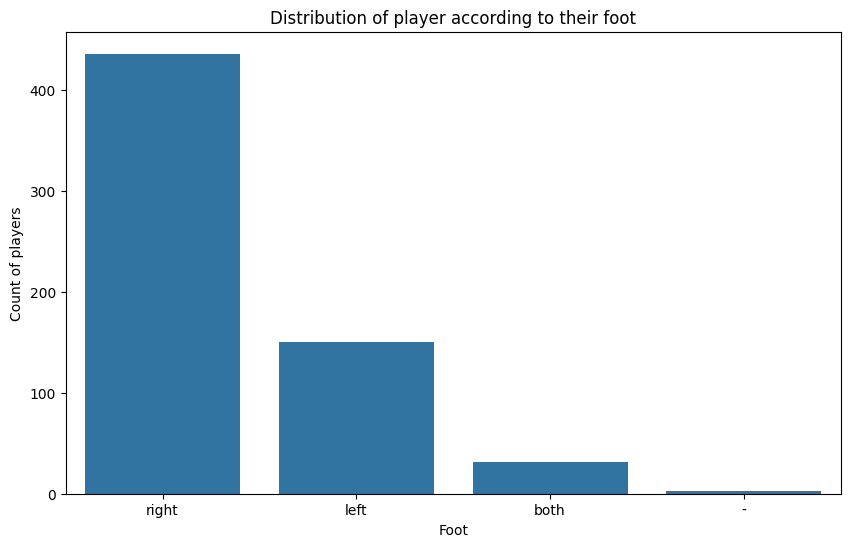

In [38]:
plt.figure(figsize=(10,6))
sns.countplot(x='Foot',data=df)
plt.xlabel("Foot")
plt.ylabel('Count of players')
plt.title("Distribution of player according to their foot")
plt.show()

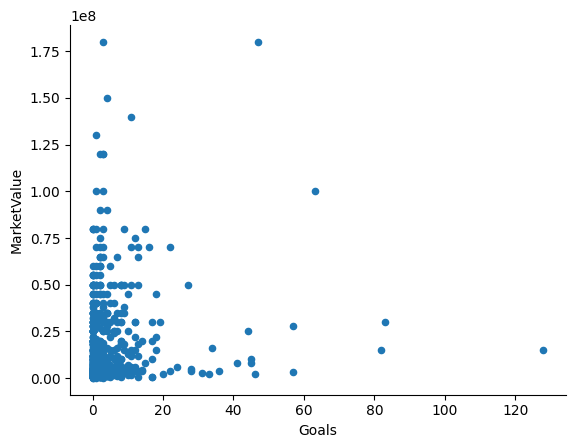

In [45]:
df.plot(kind='scatter', x='Goals', y='MarketValue')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [39]:
df

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
0,Marc-André ter Stegen,Goalkeeper,32,FC Barcelona,187,right,40,0,28000000,Germany
1,Manuel Neuer,Goalkeeper,38,Bayern Munich,193,right,119,0,4000000,Germany
2,Oliver Baumann,Goalkeeper,34,TSG 1899 Hoffenheim,187,right,0,0,3000000,Germany
3,Nico Schlotterbeck,Centre-Back,24,Borussia Dortmund,191,left,12,0,40000000,Germany
4,Jonathan Tah,Centre-Back,28,Bayer 04 Leverkusen,195,right,25,0,30000000,Germany
...,...,...,...,...,...,...,...,...,...,...
618,Adam Hlozek,Second Striker,21,Bayer 04 Leverkusen,188,right,31,2,12000000,Czech Republic
619,Patrik Schick,Centre-Forward,28,Bayer 04 Leverkusen,191,left,37,18,22000000,Czech Republic
620,Mojmír Chytil,Centre-Forward,25,SK Slavia Prague,187,-,12,4,6500000,Czech Republic
621,Jan Kuchta,Centre-Forward,27,AC Sparta Prague,185,right,20,3,5000000,Czech Republic


##Summary

*   Groups data by 'Country' and sums the goals.
*   Creates a bar plot showing total goals for each country.
* Rotates x-axis labels for better readability.
* Sets labels and title for the plot.
* Annotates each bar with its height value (number of goals).
Displays the plot.

<ipython-input-46-8159cb4f89d3>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  goal_country_plot.set_xticklabels(goal_countrt_plot.get_xticklabels(),rotation=90)


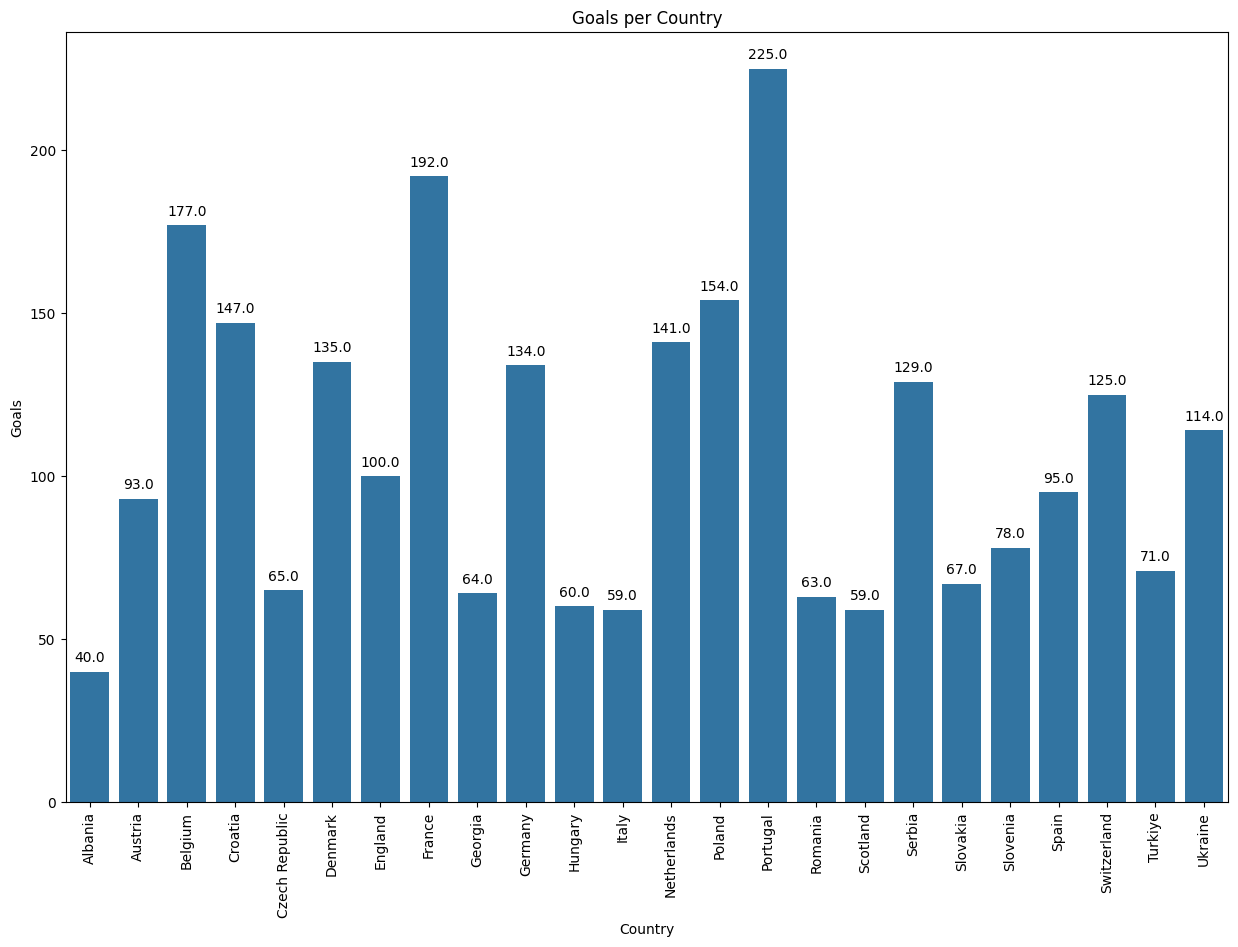

In [46]:
df_grouped=df.groupby('Country').sum().reset_index()
plt.figure(figsize=(15, 10))

goal_country_plot=sns.barplot(x='Country',y='Goals',data=df_grouped)
goal_country_plot.set_xticklabels(goal_countrt_plot.get_xticklabels(),rotation=90)
plt.xlabel("Country")
plt.ylabel("Goals")
plt.title("Goals per Country")

for pvalue in goal_country_plot.patches:
    goal_country_plot.annotate(format(pvalue.get_height(), '.1f'),
                      (pvalue.get_x() + pvalue.get_width() / 2., pvalue.get_height()),
                      ha='center', va='center',
                      xytext=(0, 10),
                      textcoords='offset points')
plt.show()

##Summary

*   Groups data by 'Country' and sums the MarketValue.
*   Creates a bar plot showing total MarketValue for each country.
* Rotates x-axis labels for better readability.
* Sets labels and title for the plot.
* Annotates each bar with its height value (number of MarketValue).
Displays the plot.

<ipython-input-47-c968f80b55bd>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  goal_country_plot.set_xticklabels(goal_countrt_plot.get_xticklabels(),rotation=90)


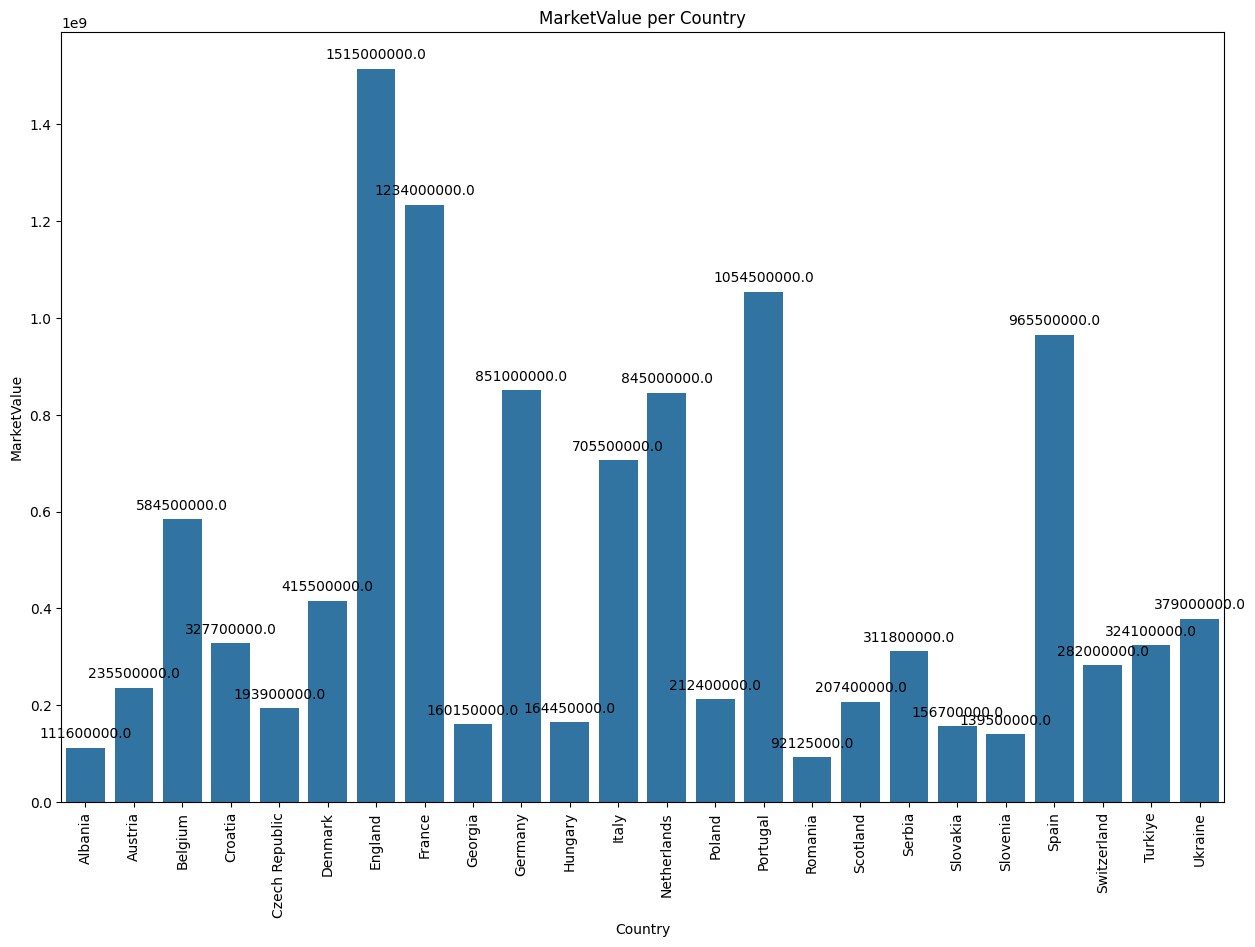

In [47]:
df_grouped=df.groupby('Country').sum().reset_index()
plt.figure(figsize=(15, 10))

goal_country_plot=sns.barplot(x='Country',y='MarketValue',data=df_grouped)
goal_country_plot.set_xticklabels(goal_countrt_plot.get_xticklabels(),rotation=90)
plt.xlabel("Country")
plt.ylabel("MarketValue")
plt.title("MarketValue per Country")

for pvalue in goal_country_plot.patches:
    goal_country_plot.annotate(format(pvalue.get_height(), '.1f'),
                      (pvalue.get_x() + pvalue.get_width() / 2., pvalue.get_height()),
                      ha='center', va='center',
                      xytext=(0, 10),
                      textcoords='offset points')
plt.show()

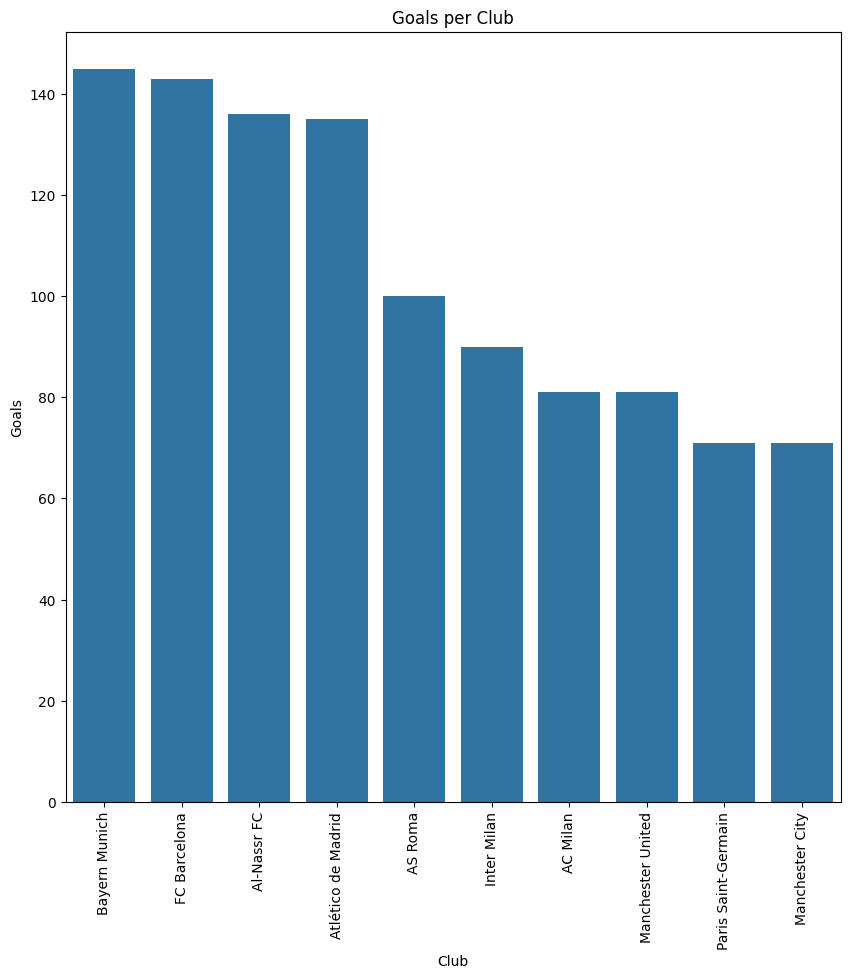

In [53]:
data_group=df.groupby('Club').sum().reset_index()
top_10_clubs=data_group.sort_values(by='Goals',ascending=False).head(10)
plt.figure(figsize=(10, 10))
sns.barplot(x='Club',y='Goals',data=top_10_clubs)
plt.xlabel("Club")
plt.ylabel("Goals")
plt.title("Goals per Club")
plt.xticks(rotation=90)
plt.show()

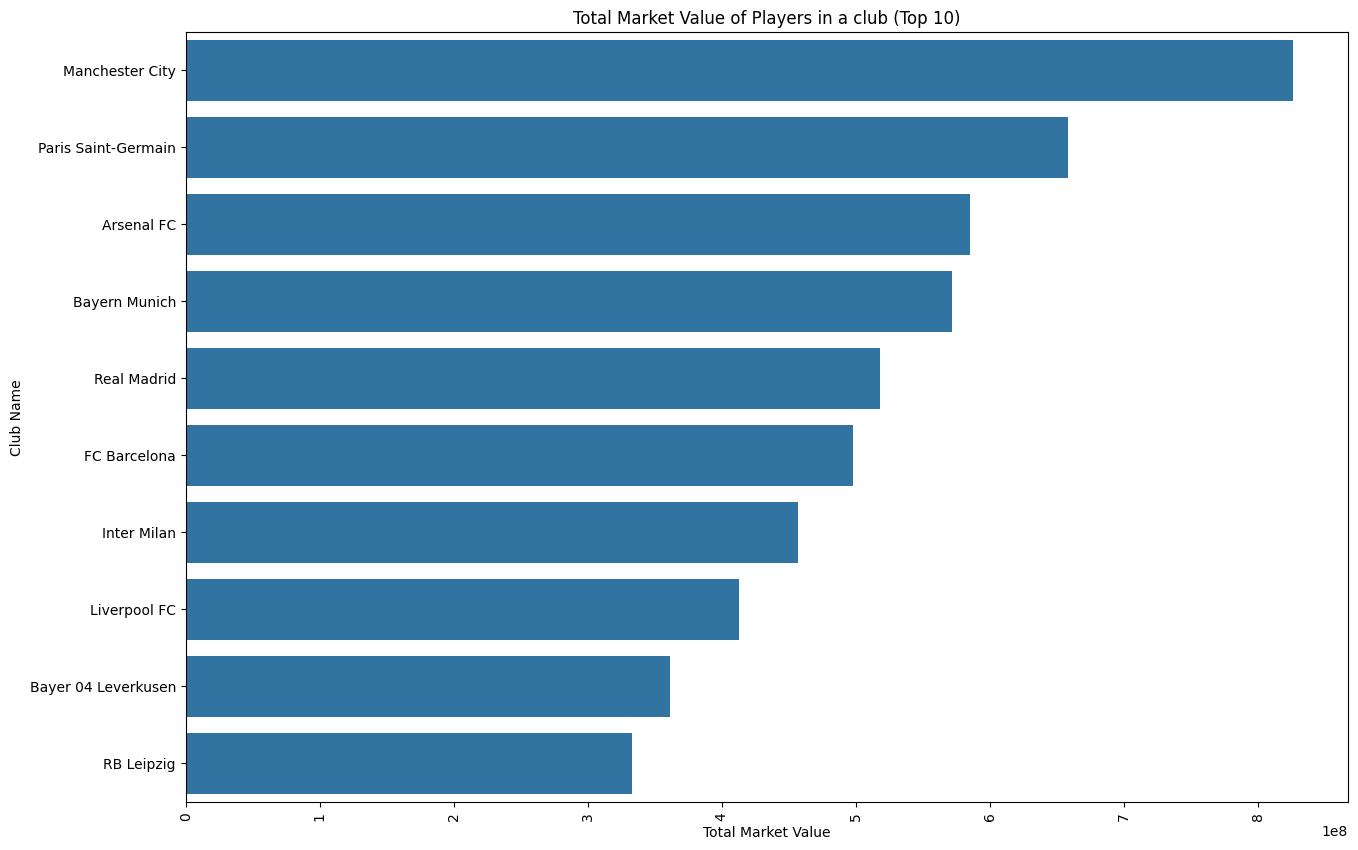

In [51]:
data_group=df.groupby('Club').sum().reset_index()
top_10_clubs=data_group.sort_values(by='MarketValue',ascending=False).head(10)
plt.figure(figsize=(10, 15))
sns.barplot(x='MarketValue',y='Club',data=top_10_clubs)
plt.xlabel("Total Market Value")
plt.ylabel("Club Name")
plt.title("Total Market Value of Players in a club (Top 10)")
plt.xticks(rotation=90)
plt.show()

In [54]:
from plotly import express

for column in ['Name',
 'Position',
 'Age',
 'Club',
 'Height',
 'Foot',
 'Caps',
 'Goals',
 'MarketValue',
 'Country']:
    express.histogram(data_frame=df, x=column).show()